In [1]:
%load_ext autoreload
%autoreload 2

# read metrics colums for the target dev/architecture (e.g.,1080ti)

In [2]:
inputFolder = 'metrics_1080ti'
metricsFolder = inputFolder

import os
import sys # error msg, add the modules
from sklearn import preprocessing

sys.path.append('../pycode')
from magus import read_trace

In [3]:
appTrace = os.listdir(inputFolder)
#appTrace

In [4]:
appTrace

['jpegNPP_metrics.csv',
 'MC_EstimatePiQ_metrics.csv',
 'MC_EstimatePiInlineP_metrics.csv',
 'convolutionTexture_metrics.csv',
 'cuSolverDn_LinearSolver_metrics.csv',
 'quasirandomGenerator_metrics.csv',
 'batchCUBLAS_metrics.csv',
 'lineOfSight_metrics.csv',
 'nvgraph_Pagerank_metrics.csv',
 'cuSolverSp_LowlevelCholesky_metrics.csv',
 'eigenvalues_metrics.csv',
 'binomialOptions_metrics.csv',
 'HSOpticalFlow_metrics.csv',
 'cannyEdgeDetectorNPP_metrics.csv',
 'fastWalshTransform_metrics.csv',
 'FilterBorderControlNPP_metrics.csv',
 'cuSolverSp_LowlevelQR_metrics.csv',
 'dct8x8_metrics.csv',
 'dwtHaar1D_metrics.csv',
 'BlackScholes_metrics.csv',
 'nvgraph_SSSP_metrics.csv',
 'simpleCUBLAS_metrics.csv',
 'simpleCUFFT_metrics.csv',
 'MersenneTwisterGP11213_metrics.csv',
 'nvgraph_SemiRingSpMV_metrics.csv',
 'interval_metrics.csv',
 'c++11_cuda_metrics.csv',
 'freeImageInteropNPP_metrics.csv',
 'cuSolverSp_LinearSolver_metrics.csv',
 'SobolQRNG_metrics.csv',
 'conjugateGradient_metrics.cs

### extract architecture metrics

In [5]:
import json
import codecs

In [6]:
# 1080ti: pascal

gpuArch = 'pascal_1080ti'

for currentFile in appTrace:
    file_csv = inputFolder + '/' + currentFile 
    df_app = read_trace(file_csv)
    #print df_app
    kernelList = df_app['Kernel'].unique()
    metricsAll = {}
    metricsAll[gpuArch] = list(df_app['Metric Name'].unique())
    #print type(metricsAll[gpuArch])
    with codecs.open(gpuArch +'_metrics.json', 'w', encoding='utf-8') as outfile:
        json.dump(metricsAll, outfile, ensure_ascii=False)
        
    break

In [7]:
metricsAll[gpuArch]

['inst_per_warp',
 'branch_efficiency',
 'warp_execution_efficiency',
 'warp_nonpred_execution_efficiency',
 'inst_replay_overhead',
 'shared_load_transactions_per_request',
 'shared_store_transactions_per_request',
 'local_load_transactions_per_request',
 'local_store_transactions_per_request',
 'gld_transactions_per_request',
 'gst_transactions_per_request',
 'shared_store_transactions',
 'shared_load_transactions',
 'local_load_transactions',
 'local_store_transactions',
 'gld_transactions',
 'gst_transactions',
 'sysmem_read_transactions',
 'sysmem_write_transactions',
 'l2_read_transactions',
 'l2_write_transactions',
 'global_hit_rate',
 'local_hit_rate',
 'gld_requested_throughput',
 'gst_requested_throughput',
 'gld_throughput',
 'gst_throughput',
 'local_memory_overhead',
 'tex_cache_hit_rate',
 'l2_tex_read_hit_rate',
 'l2_tex_write_hit_rate',
 'tex_cache_throughput',
 'l2_tex_read_throughput',
 'l2_tex_write_throughput',
 'l2_read_throughput',
 'l2_write_throughput',
 'sysme

In [8]:
print len(metricsAll[gpuArch])

120


# read all metrics of the training set

In [9]:
import json
import yaml
import numpy as np
import pandas as pd
import sys

# from magus import adjust_metric

In [10]:
#
# read metrics
#
with open('pascal_1080ti_metrics.json', 'r') as metricsFile:
     metricsAll = yaml.safe_load(metricsFile)
        
TargetMetrics = metricsAll[gpuArch]        

featureDim = len(TargetMetrics)
print("Metrics on Pascal GPUs (1080Ti): {}".format(featureDim))

Metrics on Pascal GPUs (1080Ti): 120


### Attention! You may need to add/del certain metrics depending on the GPU arch

In [11]:
# maxwell + pascal
Percentage2decimal_Metrics = ['sm_efficiency', 'branch_efficiency', 
        'warp_execution_efficiency', 'warp_nonpred_execution_efficiency', 
        'issue_slot_utilization', 'global_hit_rate', 'local_hit_rate',
        'gld_efficiency', 'gst_efficiency', 'shared_efficiency', 
        'stall_inst_fetch', 'stall_exec_dependency', 'stall_memory_dependency',
        'stall_texture', 'stall_sync', 'stall_other',
        'stall_constant_memory_dependency', 'stall_pipe_busy',
        'stall_memory_throttle', 'stall_not_selected', 'local_memory_overhead', 
        'tex_cache_hit_rate','l2_tex_read_hit_rate', 'l2_tex_write_hit_rate', 
        'flop_sp_efficiency', 'flop_dp_efficiency', 'sm_activity', 'flop_hp_efficiency']


Throughput_Metrics = ['gld_requested_throughput', 'gst_requested_throughput', 
        'gld_throughput', 'gst_throughput', 'dram_read_throughput', 
        'dram_write_throughput', 'tex_cache_throughput', 'local_load_throughput', 
        'local_store_throughput', 'shared_load_throughput', 
        'shared_store_throughput', 'l2_tex_read_throughput', 
        'l2_tex_write_throughput', 'l2_read_throughput', 'l2_write_throughput', 
        'sysmem_read_throughput', 'sysmem_write_throughput', 
        'l2_atomic_throughput', 'ecc_throughput']

Utilization2decimal_Metrics = ['cf_fu_utilization', 'tex_fu_utilization', 
        'ldst_fu_utilization', 'double_precision_fu_utilization', 
        'special_fu_utilization', 'single_precision_fu_utilization', 
        'dram_utilization', 'tex_utilization', 'shared_utilization', 
        'l2_utilization', 'sysmem_utilization', 'sysmem_read_utilization', 
        'sysmem_write_utilization', 'half_precision_fu_utilization']

In [12]:
#------------------------------------------------------------------------------
# convert metric from original format to the target presentation 
#------------------------------------------------------------------------------
def adjust_metric(metricName, metricValue):
    """
    Adjust metric from dataframe containing nvprof results.
    """ 
    metricValue_str= str(metricValue)
    
    #
    # update the value if the metric belongs to the following 3 groups
    # 

    # convert % to decimal
    if metricName in Percentage2decimal_Metrics: 
        adjustedV = float(metricValue_str[:-1]) * 0.01
    # scale to GB/s
    elif metricName in Throughput_Metrics: 
        if "GB/s" in metricValue_str:
            adjustedV = float(metricValue_str[:-4])
        elif "MB/s" in metricValue_str:
            adjustedV = float(metricValue_str[:-4]) * 1e-3
        elif "KB/s" in metricValue_str:
            adjustedV = float(metricValue_str[:-4]) * 1e-6
        elif "B/s" in metricValue_str:
            adjustedV = float(metricValue_str[:-3]) * 1e-9
        else:
            print "Error: unknow throughtput unit!"
            sys.exit(0)
    # convert util() to decimal
    elif metricName in Utilization2decimal_Metrics:
        adjustedV = float(metricValue_str[metricValue_str.find('(') + 1 : metricValue_str.rfind(')')]) * 0.1
        #print('{} in Utilization2decimal_Metrics.'.format(local_metric_value))
    else:
        adjustedV = float(metricValue)  # apply float as default

    #print('{} : {}'.format(metricName, metricValue))
    #print('{} : {}'.format(metricName, adjustedV))

    return adjustedV

In [13]:
appTrace = os.listdir(metricsFolder)
# print len(appTrace)
# print appTrace

#
# read each file
#
app_kernel_metrics_dd = {}
for currentFile in appTrace:
    # read the csv files in the metrics folder
    file_csv = metricsFolder + '/' + currentFile 
    appName = currentFile[:-12]
    
    df_app = read_trace(file_csv)
    
    kernelList = df_app['Kernel'].unique()
    #print kernelList
    
    kernel_metrics_dd = {}
    for kernName in kernelList:
        df_kern = df_app.loc[df_app['Kernel'] == kernName]
        #print kernName
        
        # go through each metrics and read the avg value
        metrics_dd = {}
        
        for index, rows in df_kern.iterrows():
            local_metric_name = rows['Metric Name']
            local_metric_value = rows['Avg']
            
            try:
                adjustedV = adjust_metric(local_metric_name, local_metric_value)
            except:
                print("Unexpected error!\nfile: {}\nmetric: {}\nvalue: {}".format(currentFile, 
                    local_metric_name, local_metric_value))
                sys.exit(0)
            
            metrics_dd[local_metric_name] = adjustedV
            #break
            
        # update 
        kernel_metrics_dd[kernName] = metrics_dd
        #break
        
    # update
    app_kernel_metrics_dd[appName] = kernel_metrics_dd
    #break

#
# check
#
print("applications : {}".format(len(app_kernel_metrics_dd)))

totalKernNum = 0
for app, kern_metrics_dd in app_kernel_metrics_dd.iteritems():
    #print len(kern_metrics_dd)
    totalKernNum += len(kern_metrics_dd)

print("kernels : {}".format(str(totalKernNum)))

applications : 56
kernels : 287


### example

In [14]:
app_kernel_metrics_dd['scan']

{'scanExclusiveShared(uint4*, uint4*, unsigned int)': {'achieved_occupancy': 0.944887,
  'atomic_transactions': 0.0,
  'atomic_transactions_per_request': 0.0,
  'branch_efficiency': 1.0,
  'cf_executed': 419719.0,
  'cf_fu_utilization': 0.1,
  'cf_issued': 419719.0,
  'double_precision_fu_utilization': 0.0,
  'dram_read_throughput': 179.072842,
  'dram_read_transactions': 851995.0,
  'dram_utilization': 0.8,
  'dram_write_throughput': 178.276561,
  'dram_write_transactions': 848209.0,
  'ecc_throughput': 0.0,
  'ecc_transactions': 0.0,
  'eligible_warps_per_cycle': 0.751545,
  'executed_ipc': 0.703677,
  'flop_count_dp': 0.0,
  'flop_count_dp_add': 0.0,
  'flop_count_dp_fma': 0.0,
  'flop_count_dp_mul': 0.0,
  'flop_count_hp': 0.0,
  'flop_count_hp_add': 0.0,
  'flop_count_hp_fma': 0.0,
  'flop_count_hp_mul': 0.0,
  'flop_count_sp': 0.0,
  'flop_count_sp_add': 0.0,
  'flop_count_sp_fma': 0.0,
  'flop_count_sp_mul': 0.0,
  'flop_count_sp_special': 0.0,
  'flop_dp_efficiency': 0.0,
  'fl

# Offline Training

## feature matrix

In [15]:
featMatCols = ['KernelName']         
featMatCols.extend(TargetMetrics)

In [16]:
featMatCols

['KernelName',
 'inst_per_warp',
 'branch_efficiency',
 'warp_execution_efficiency',
 'warp_nonpred_execution_efficiency',
 'inst_replay_overhead',
 'shared_load_transactions_per_request',
 'shared_store_transactions_per_request',
 'local_load_transactions_per_request',
 'local_store_transactions_per_request',
 'gld_transactions_per_request',
 'gst_transactions_per_request',
 'shared_store_transactions',
 'shared_load_transactions',
 'local_load_transactions',
 'local_store_transactions',
 'gld_transactions',
 'gst_transactions',
 'sysmem_read_transactions',
 'sysmem_write_transactions',
 'l2_read_transactions',
 'l2_write_transactions',
 'global_hit_rate',
 'local_hit_rate',
 'gld_requested_throughput',
 'gst_requested_throughput',
 'gld_throughput',
 'gst_throughput',
 'local_memory_overhead',
 'tex_cache_hit_rate',
 'l2_tex_read_hit_rate',
 'l2_tex_write_hit_rate',
 'tex_cache_throughput',
 'l2_tex_read_throughput',
 'l2_tex_write_throughput',
 'l2_read_throughput',
 'l2_write_throu

In [17]:
#
#  totalKernNum  x featureDim
#
df_featureMat = pd.DataFrame(index=np.arange(0, totalKernNum), columns=featMatCols)
print df_featureMat.shape

(287, 121)


In [18]:
#
# export data to data frame, so that we can export to csv file easily
#
rowId = 0
for appName, kern_metrics_dd in app_kernel_metrics_dd.iteritems():
    for kernName, metrics_dd in kern_metrics_dd.iteritems():
        app_kern_name = '[[ '+ str(appName) + ' ]] ' + str(kernName)
        
        # add kernel name to the list
        df_featureMat.loc[rowId, 'KernelName'] = app_kern_name

        # add other metrics according to the column order
        for eachMetric in TargetMetrics:
            try:                
                df_featureMat.loc[rowId, eachMetric] = metrics_dd[eachMetric]
            except Exception as e:
                print e.message, e.args
                print('ERROR!! App = {}, Kernel={}'.format(appName, kernName))
                sys.exit(0)

        rowId += 1

In [19]:
df_featureMat

,KernelName,inst_per_warp,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,shared_load_transactions_per_request,shared_store_transactions_per_request,local_load_transactions_per_request,local_store_transactions_per_request,...,flop_sp_efficiency,flop_dp_efficiency,dram_read_transactions,dram_write_transactions,dram_read_throughput,dram_write_throughput,dram_utilization,half_precision_fu_utilization,ecc_transactions,ecc_throughput
0,[[ boxFilterNPP ]] void ForEachTupleByteQuad<u...,1905.07,0.814055,0.583441,0.578701,0.003072,0,0,0,0,...,0.0012939,0,0,1933,0,3.45241,0.1,0,0,0
1,"[[ scan ]] scanExclusiveShared(uint4*, uint4*,...",98.6471,1,1,0.979783,0.001084,1.29412,1.29412,0,0,...,0,0,851995,848209,179.073,178.277,0.8,0,0,0
2,"[[ scan ]] uniformUpdate(uint4*, unsigned int*)",20.625,1,0.970644,0.970455,0.001378,1,1,0,0,...,0,0,852823,849076,179.206,178.419,0.8,0,0,0
3,"[[ scan ]] scanExclusiveShared2(unsigned int*,...",88.5,1,1,0.950506,0.024747,1.5,1.5,0,0,...,0,0,12986,14081,46.7803,50.7245,0.3,0,0,0
4,"[[ c++11_cuda ]] xyzw_frequency(int*, char*, int)",34264.5,0.844726,0.70327,0.700153,8.8e-05,0,0,0,0,...,0,0,100776,41920,5.60563,2.33203,0.1,0,0,0
5,[[ c++11_cuda ]] xyzw_frequency_thrust_device(...,3.22351e+07,1,0.03125,0.03125,0,0,0,0,0,...,0,0,103599,42207,0.0200272,0.00762939,0.1,0,0,0
6,[[ cuSolverSp_LinearSolver ]] void pegasus_sca...,31.9188,1,0.999523,0.905853,0.058006,0,0,0,0,...,0,0,23,34647,0.137329,202.027,0.5,0,0,0
7,[[ cuSolverSp_LinearSolver ]] void pegasus_sym...,32.9145,1,0.999513,0.938904,0.060763,0,0,0,0,...,0,0,12439,2443,87.6794,17.2202,0.3,0,0,0
8,[[ cuSolverSp_LinearSolver ]] void gather_core...,31.9955,1,0.999984,0.906238,0.005258,0,0,0,0,...,0,0,255589,170477,156.425,104.335,0.6,0,0,0
9,[[ cuSolverSp_LinearSolver ]] void chol_check_...,26.6938,1,0.999181,0.925135,0.074924,0,0,0,0,...,0,0,10031,7970,56.8116,45.1393,0.3,0,0,0


# feature scaling

In [20]:
df_featureMat = df_featureMat.convert_objects(convert_numeric=True)

df_featureMat_cp = df_featureMat.copy()
df_featureMat_cp = df_featureMat_cp.drop('KernelName', axis=1)   # remove the 1st column

/Users/leiming/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [21]:
df_featureMat_cp

,inst_per_warp,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,shared_load_transactions_per_request,shared_store_transactions_per_request,local_load_transactions_per_request,local_store_transactions_per_request,gld_transactions_per_request,...,flop_sp_efficiency,flop_dp_efficiency,dram_read_transactions,dram_write_transactions,dram_read_throughput,dram_write_throughput,dram_utilization,half_precision_fu_utilization,ecc_transactions,ecc_throughput
0,1.905070e+03,0.814055,0.583441,0.578701,0.003072,0.000000,0.000000,0.000000,0.000000,3.687500,...,0.001294,0.000000,0.0,1933.0,0.000000,3.452413,0.1,0.0,0.0,0.0
1,9.864706e+01,1.000000,1.000000,0.979783,0.001084,1.294118,1.294118,0.000000,0.000000,16.000000,...,0.000000,0.000000,851995.0,848209.0,179.072842,178.276561,0.8,0.0,0.0,0.0
2,2.062500e+01,1.000000,0.970644,0.970455,0.001378,1.000000,1.000000,0.000000,0.000000,14.333333,...,0.000000,0.000000,852823.0,849076.0,179.206021,178.419054,0.8,0.0,0.0,0.0
3,8.850000e+01,1.000000,1.000000,0.950506,0.024747,1.500000,1.500000,0.000000,0.000000,32.000000,...,0.000000,0.000000,12986.0,14081.0,46.780333,50.724484,0.3,0.0,0.0,0.0
4,3.426453e+04,0.844726,0.703270,0.700153,0.000088,0.000000,0.000000,0.000000,0.000000,3.999980,...,0.000000,0.000000,100776.0,41920.0,5.605631,2.332032,0.1,0.0,0.0,0.0
5,3.223507e+07,1.000000,0.031250,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,103599.0,42207.0,0.020027,0.007629,0.1,0.0,0.0,0.0
6,3.191880e+01,1.000000,0.999523,0.905853,0.058006,0.000000,0.000000,0.000000,0.000000,7.993562,...,0.000000,0.000000,23.0,34647.0,0.137329,202.027149,0.5,0.0,0.0,0.0
7,3.291453e+01,1.000000,0.999513,0.938904,0.060763,0.000000,0.000000,0.000000,0.000000,12.968884,...,0.000000,0.000000,12439.0,2443.0,87.679364,17.220154,0.3,0.0,0.0,0.0
8,3.199554e+01,1.000000,0.999984,0.906238,0.005258,0.000000,0.000000,0.000000,0.000000,19.994624,...,0.000000,0.000000,255589.0,170477.0,156.424940,104.335137,0.6,0.0,0.0,0.0
9,2.669375e+01,1.000000,0.999181,0.925135,0.074924,0.000000,0.000000,0.000000,0.000000,20.964856,...,0.000000,0.000000,10031.0,7970.0,56.811608,45.139343,0.3,0.0,0.0,0.0


In [22]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_featureMat_cp)

In [23]:
scaled_df = pd.DataFrame(scaled_df, columns=df_featureMat_cp.columns)

In [24]:
scaled_df

,inst_per_warp,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,shared_load_transactions_per_request,shared_store_transactions_per_request,local_load_transactions_per_request,local_store_transactions_per_request,gld_transactions_per_request,...,flop_sp_efficiency,flop_dp_efficiency,dram_read_transactions,dram_write_transactions,dram_read_throughput,dram_write_throughput,dram_utilization,half_precision_fu_utilization,ecc_transactions,ecc_throughput
0,5.903726e-05,0.312041,0.570004,5.651103e-01,0.006912,0.000000,0.000000,0.000000,0.000000,0.115234,...,0.003912,0.000000,0.000000e+00,2.277825e-04,0.000000,0.009012,0.111111,0.0,0.0,0.0
1,2.998196e-06,1.000000,1.000000,9.791313e-01,0.002439,0.061429,0.117290,0.000000,0.000000,0.500000,...,0.000000,0.000000,7.211146e-02,9.995199e-02,0.537391,0.465354,0.888889,0.0,0.0,0.0
2,5.777868e-07,1.000000,0.969697,9.695015e-01,0.003101,0.047468,0.090633,0.000000,0.000000,0.447917,...,0.000000,0.000000,7.218154e-02,1.000542e-01,0.537791,0.465726,0.888889,0.0,0.0,0.0
3,2.683413e-06,1.000000,1.000000,9.489098e-01,0.055681,0.071202,0.135950,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.099114e-03,1.659289e-03,0.140386,0.132406,0.333333,0.0,0.0,0.0
4,1.062896e-03,0.425520,0.693698,6.904809e-01,0.000198,0.000000,0.000000,0.000000,0.000000,0.124999,...,0.000000,0.000000,8.529515e-03,4.939806e-03,0.016822,0.006087,0.111111,0.0,0.0,0.0
5,1.000000e+00,1.000000,0.000000,2.064516e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,...,0.000000,0.000000,8.768449e-03,4.973625e-03,0.000060,0.000020,0.111111,0.0,0.0,0.0
6,9.281444e-07,1.000000,0.999508,9.028155e-01,0.130514,0.000000,0.000000,0.000000,0.000000,0.249799,...,0.000000,0.000000,1.946682e-06,4.082763e-03,0.000412,0.527350,0.555556,0.0,0.0,0.0
7,9.590340e-07,1.000000,0.999497,9.369330e-01,0.136717,0.000000,0.000000,0.000000,0.000000,0.405278,...,0.000000,0.000000,1.052817e-03,2.878804e-04,0.263123,0.044950,0.333333,0.0,0.0,0.0
8,9.305250e-07,1.000000,0.999984,9.032130e-01,0.011831,0.000000,0.000000,0.000000,0.000000,0.624832,...,0.000000,0.000000,2.163263e-02,2.008882e-02,0.469426,0.272345,0.666667,0.0,0.0,0.0
9,7.660523e-07,1.000000,0.999154,9.227196e-01,0.168579,0.000000,0.000000,0.000000,0.000000,0.655152,...,0.000000,0.000000,8.490074e-04,9.391758e-04,0.170490,0.117827,0.333333,0.0,0.0,0.0


### save the scaling factors for future use

In [25]:
metrics_scale_dd = {}
index = 0
for col_name in df_featureMat_cp.columns:
    #print col_name
    metrics_scale_dd[col_name] = [scaler.data_min_[index], scaler.data_max_[index]]
    index += 1

#print metrics_scale_dd

with codecs.open('pascal_1080ti_metrics_scaler.json', 'w', encoding='utf-8') as outfile:
    json.dump(metrics_scale_dd, outfile, ensure_ascii=False)

# remove low variance features

In [26]:
from sklearn.feature_selection import VarianceThreshold

In [27]:
featureMatColumns = scaled_df.columns

X = scaled_df.values

p = 0.99

vt = VarianceThreshold(threshold=(p * (1 - p)))

vt.fit(X)

# get the indices of the features that are being kept
feature_indices = vt.get_support(indices=True)

print('\nselected feature indices: {}'.format(feature_indices))
print('\n=>features after removing low variance: {}'.format(len(feature_indices)))



selected feature indices: [  1   2   3   4   7   8   9  10  12  13  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  37  40  41  42  43  56  57  58  59  60  61
  62  63  64  65  80  84  85  93  94  95  96  97  98  99 101 102 103 104
 105 106 107 108 110 111 113 114 115 116]

=>features after removing low variance: 64


In [28]:
print len(vt.variances_)
#print vt.variances_

120


In [29]:
# remove low-variance columns from index
feature_names = [featureMatColumns[idx] for idx, _ in enumerate(featureMatColumns) if idx in feature_indices]
print feature_names

['branch_efficiency', 'warp_execution_efficiency', 'warp_nonpred_execution_efficiency', 'inst_replay_overhead', 'local_load_transactions_per_request', 'local_store_transactions_per_request', 'gld_transactions_per_request', 'gst_transactions_per_request', 'shared_load_transactions', 'local_load_transactions', 'global_hit_rate', 'local_hit_rate', 'gld_requested_throughput', 'gst_requested_throughput', 'gld_throughput', 'gst_throughput', 'local_memory_overhead', 'tex_cache_hit_rate', 'l2_tex_read_hit_rate', 'l2_tex_write_hit_rate', 'tex_cache_throughput', 'l2_tex_read_throughput', 'l2_tex_write_throughput', 'l2_read_throughput', 'l2_write_throughput', 'sysmem_write_throughput', 'shared_load_throughput', 'shared_store_throughput', 'gld_efficiency', 'gst_efficiency', 'sysmem_utilization', 'stall_inst_fetch', 'stall_exec_dependency', 'stall_memory_dependency', 'stall_texture', 'stall_sync', 'stall_other', 'stall_constant_memory_dependency', 'stall_pipe_busy', 'shared_efficiency', 'atomic_tra

In [30]:
len(feature_names)

64

In [31]:
# with open('1080ti_featsel_feat64.json', 'w') as outfile:
#     json.dump(feature_names, outfile)

In [32]:
Feat64 = feature_names

## save the metrics with high variance

In [33]:
selectec_columns = ['KernelName']         
selectec_columns.extend(feature_names)
# print selectec_columns

In [34]:
df_featureMat = df_featureMat[selectec_columns]

In [35]:
#
# read the metrics_scale.jason
#
with open('pascal_1080ti_metrics_scaler.json', 'r') as metricsFile:
     metrics_scale_dd = yaml.safe_load(metricsFile)
        
metrics_scale_dd

{'achieved_occupancy': [0.015602, 0.98597],
 'atomic_transactions': [0.0, 80413.0],
 'atomic_transactions_per_request': [0.0, 5.210042],
 'branch_efficiency': [0.7297148, 1.0],
 'cf_executed': [1.0, 1380367395.0],
 'cf_fu_utilization': [0.1, 0.30000000000000004],
 'cf_issued': [1.0, 1380367395.0],
 'double_precision_fu_utilization': [0.0, 1.0],
 'dram_read_throughput': [0.0, 333.226286],
 'dram_read_transactions': [0.0, 11814974.0],
 'dram_utilization': [0.0, 0.9],
 'dram_write_throughput': [0.0, 383.09861],
 'dram_write_transactions': [0.0, 8486164.0],
 'ecc_throughput': [0.0, 0.0],
 'ecc_transactions': [0.0, 0.0],
 'eligible_warps_per_cycle': [0.008741, 8.993029],
 'executed_ipc': [0.010014, 3.372016],
 'flop_count_dp': [0.0, 939702716.0],
 'flop_count_dp_add': [0.0, 94379405.0],
 'flop_count_dp_fma': [0.0, 404701375.0],
 'flop_count_dp_mul': [0.0, 66591523.0],
 'flop_count_hp': [0.0, 0.0],
 'flop_count_hp_add': [0.0, 0.0],
 'flop_count_hp_fma': [0.0, 0.0],
 'flop_count_hp_mul': [0.0

In [36]:
#
# apply the scaling
#
df_featureMat_columns = df_featureMat.columns
for select_metric, min_max in metrics_scale_dd.iteritems():
    if select_metric in df_featureMat_columns:
        x_min, x_max = float(min_max[0]), float(min_max[1])   # convert the metrics to fp32
        try:
            x_range = x_max - x_min
        except Exception as e:
            print e.message, e.args
            print('ERROR!! select metric = {}, min = {}, max = {}'.format(select_metric, x_min, x_max))
            sys.exit(0)
            
        ## note: sometimes the value is in scientific notation, we need to convert to fp32 before scaling
        df_featureMat[select_metric] = df_featureMat[select_metric].apply(lambda x : (float(x) - x_min) / x_range)

In [37]:
df_featureMat

,KernelName,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,local_load_transactions_per_request,local_store_transactions_per_request,gld_transactions_per_request,gst_transactions_per_request,shared_load_transactions,...,special_fu_utilization,tex_fu_utilization,single_precision_fu_utilization,double_precision_fu_utilization,flop_sp_efficiency,flop_dp_efficiency,dram_write_transactions,dram_read_throughput,dram_write_throughput,dram_utilization
0,[[ boxFilterNPP ]] void ForEachTupleByteQuad<u...,0.312041,0.570004,5.651103e-01,0.006912,0.000000,0.000000,0.115234,0.250000,0.000000e+00,...,0.333333,0.111111,0.285714,0.0,0.003912,0.000000,2.277825e-04,0.000000,0.009012,0.111111
1,"[[ scan ]] scanExclusiveShared(uint4*, uint4*,...",1.000000,1.000000,9.791313e-01,0.002439,0.000000,0.000000,0.500000,0.500000,2.784930e-02,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,9.995199e-02,0.537391,0.465354,0.888889
2,"[[ scan ]] uniformUpdate(uint4*, unsigned int*)",1.000000,0.969697,9.695015e-01,0.003101,0.000000,0.000000,0.447917,0.500000,1.956358e-03,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,1.000542e-01,0.537791,0.465726,0.888889
3,"[[ scan ]] scanExclusiveShared2(unsigned int*,...",1.000000,1.000000,9.489098e-01,0.055681,0.000000,0.000000,1.000000,0.125000,9.934631e-05,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,1.659289e-03,0.140386,0.132406,0.333333
4,"[[ c++11_cuda ]] xyzw_frequency(int*, char*, int)",0.425520,0.693698,6.904809e-01,0.000198,0.000000,0.000000,0.124999,0.000000,0.000000e+00,...,0.333333,0.111111,0.000000,0.0,0.000000,0.000000,4.939806e-03,0.016822,0.006087,0.111111
5,[[ c++11_cuda ]] xyzw_frequency_thrust_device(...,1.000000,0.000000,2.064516e-08,0.000000,0.000000,0.000000,0.031250,0.031250,0.000000e+00,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,4.973625e-03,0.000060,0.000020,0.111111
6,[[ cuSolverSp_LinearSolver ]] void pegasus_sca...,1.000000,0.999508,9.028155e-01,0.130514,0.000000,0.000000,0.249799,0.567496,0.000000e+00,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,4.082763e-03,0.000412,0.527350,0.555556
7,[[ cuSolverSp_LinearSolver ]] void pegasus_sym...,1.000000,0.999497,9.369330e-01,0.136717,0.000000,0.000000,0.405278,0.249799,0.000000e+00,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,2.878804e-04,0.263123,0.044950,0.333333
8,[[ cuSolverSp_LinearSolver ]] void gather_core...,1.000000,0.999984,9.032130e-01,0.011831,0.000000,0.000000,0.624832,0.249994,0.000000e+00,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,2.008882e-02,0.469426,0.272345,0.666667
9,[[ cuSolverSp_LinearSolver ]] void chol_check_...,1.000000,0.999154,9.227196e-01,0.168579,0.000000,0.000000,0.655152,0.000000,0.000000e+00,...,0.000000,0.111111,0.000000,0.1,0.000000,0.000000,9.391758e-04,0.170490,0.117827,0.333333


In [38]:
df_featureMat.shape

(287, 65)

In [39]:
#
# del the 1st column
#
columns_after_sel_list = [col for col in df_featureMat_columns if col <> 'KernelName']
print columns_after_sel_list

['branch_efficiency', 'warp_execution_efficiency', 'warp_nonpred_execution_efficiency', 'inst_replay_overhead', 'local_load_transactions_per_request', 'local_store_transactions_per_request', 'gld_transactions_per_request', 'gst_transactions_per_request', 'shared_load_transactions', 'local_load_transactions', 'global_hit_rate', 'local_hit_rate', 'gld_requested_throughput', 'gst_requested_throughput', 'gld_throughput', 'gst_throughput', 'local_memory_overhead', 'tex_cache_hit_rate', 'l2_tex_read_hit_rate', 'l2_tex_write_hit_rate', 'tex_cache_throughput', 'l2_tex_read_throughput', 'l2_tex_write_throughput', 'l2_read_throughput', 'l2_write_throughput', 'sysmem_write_throughput', 'shared_load_throughput', 'shared_store_throughput', 'gld_efficiency', 'gst_efficiency', 'sysmem_utilization', 'stall_inst_fetch', 'stall_exec_dependency', 'stall_memory_dependency', 'stall_texture', 'stall_sync', 'stall_other', 'stall_constant_memory_dependency', 'stall_pipe_busy', 'shared_efficiency', 'atomic_tra

In [40]:
FeatureMat = df_featureMat.loc[:,columns_after_sel_list].as_matrix()
FeatureMat

array([[  3.12040911e-01,   5.70003861e-01,   5.65110310e-01, ...,
          0.00000000e+00,   9.01181291e-03,   1.11111111e-01],
       [  1.00000000e+00,   1.00000000e+00,   9.79131304e-01, ...,
          5.37391105e-01,   4.65354236e-01,   8.88888889e-01],
       [  1.00000000e+00,   9.69696970e-01,   9.69501472e-01, ...,
          5.37790770e-01,   4.65726185e-01,   8.88888889e-01],
       ..., 
       [  1.00000000e+00,   1.00000000e+00,   9.87672929e-01, ...,
          6.04951384e-01,   1.60929041e-01,   6.66666667e-01],
       [  1.00000000e+00,   9.99983639e-01,   9.92586405e-01, ...,
          3.10934351e-01,   3.07449393e-01,   5.55555556e-01],
       [  9.61461634e-01,   9.60747819e-01,   9.38173452e-01, ...,
          0.00000000e+00,   1.17000406e-04,   1.11111111e-01]])

In [41]:
df_featureMat.loc[:,columns_after_sel_list]

,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,local_load_transactions_per_request,local_store_transactions_per_request,gld_transactions_per_request,gst_transactions_per_request,shared_load_transactions,local_load_transactions,...,special_fu_utilization,tex_fu_utilization,single_precision_fu_utilization,double_precision_fu_utilization,flop_sp_efficiency,flop_dp_efficiency,dram_write_transactions,dram_read_throughput,dram_write_throughput,dram_utilization
0,0.312041,0.570004,5.651103e-01,0.006912,0.000000,0.000000,0.115234,0.250000,0.000000e+00,0.000000,...,0.333333,0.111111,0.285714,0.0,0.003912,0.000000,2.277825e-04,0.000000,0.009012,0.111111
1,1.000000,1.000000,9.791313e-01,0.002439,0.000000,0.000000,0.500000,0.500000,2.784930e-02,0.000000,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,9.995199e-02,0.537391,0.465354,0.888889
2,1.000000,0.969697,9.695015e-01,0.003101,0.000000,0.000000,0.447917,0.500000,1.956358e-03,0.000000,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,1.000542e-01,0.537791,0.465726,0.888889
3,1.000000,1.000000,9.489098e-01,0.055681,0.000000,0.000000,1.000000,0.125000,9.934631e-05,0.000000,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,1.659289e-03,0.140386,0.132406,0.333333
4,0.425520,0.693698,6.904809e-01,0.000198,0.000000,0.000000,0.124999,0.000000,0.000000e+00,0.000000,...,0.333333,0.111111,0.000000,0.0,0.000000,0.000000,4.939806e-03,0.016822,0.006087,0.111111
5,1.000000,0.000000,2.064516e-08,0.000000,0.000000,0.000000,0.031250,0.031250,0.000000e+00,0.000000,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,4.973625e-03,0.000060,0.000020,0.111111
6,1.000000,0.999508,9.028155e-01,0.130514,0.000000,0.000000,0.249799,0.567496,0.000000e+00,0.000000,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,4.082763e-03,0.000412,0.527350,0.555556
7,1.000000,0.999497,9.369330e-01,0.136717,0.000000,0.000000,0.405278,0.249799,0.000000e+00,0.000000,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,2.878804e-04,0.263123,0.044950,0.333333
8,1.000000,0.999984,9.032130e-01,0.011831,0.000000,0.000000,0.624832,0.249994,0.000000e+00,0.000000,...,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,2.008882e-02,0.469426,0.272345,0.666667
9,1.000000,0.999154,9.227196e-01,0.168579,0.000000,0.000000,0.655152,0.000000,0.000000e+00,0.000000,...,0.000000,0.111111,0.000000,0.1,0.000000,0.000000,9.391758e-04,0.170490,0.117827,0.333333


In [42]:
# example
print df_featureMat.loc[0, 'branch_efficiency']
print FeatureMat[0][0]

0.31204091086
0.31204091086


In [43]:
#
# save the dataframe to csv
#


# out_filename = "FeatSel_After_Scaler_LowVar_cudasdk.csv"
# print out_filename
# df_featureMat.to_csv(out_filename, index=False, encoding='utf-8')

# Principal Feature Analysis

In [44]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances

In [45]:
class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features
        self.indices_ = None
        self.featSelected = None
        
    def test_pca(self, X):
        featNum = X.shape[1]
        
        print("PC(s)\tVariance Coverage")
        for x in range(featNum):
            pcNum = x + 1
            pca = PCA(n_components=pcNum).fit(X) # test different number of pc
            print("{}:\t{}".format(pcNum, sum(pca.explained_variance_ratio_)))
            

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]  # using all feats from X
            
        pca = PCA(n_components=self.q).fit(X) # convert all the original space to pc space
        A_q = pca.components_.T
        #print A_q.shape
        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)  # find out (K) groups
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_
        #print cluster_centers.shape


        dists = defaultdict(list)
        for i, c in enumerate(clusters): # go through each record
            # i : the sample id
            # c : the cluster label
            #
            # note: increase the scale by 1000, avoid underflow
            #
            local_sample = A_q[i, :] * 1000.0
            local_cluster = cluster_centers[c, :] * 1000.0
            #print local_sample.shape
            #print local_cluster.shape
            dist = np.linalg.norm(local_sample - local_cluster) # 2-norm / euclidean distance
            #print dist
            dists[c].append((i, dist))
        
        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]  # find the closed one to center
        self.featSelected = X[:, self.indices_]
        #print len(self.featIndices)
        
        


In [46]:
(sampleNum, featureNum) = FeatureMat.shape
print "samples : %d " % sampleNum
print "features : %d " % featureNum

samples : 287 
features : 64 


In [47]:
#
# step1: pca and list the K pc for variance coverage
#
pfa = PFA(n_features=featureNum)
pfa.test_pca(FeatureMat)

PC(s)	Variance Coverage
1:	0.250131319317
2:	0.358477864406
3:	0.448972240091
4:	0.523824769044
5:	0.589526608657
6:	0.634975051586
7:	0.674515249394
8:	0.711488654463
9:	0.742723098446
10:	0.771477404966
11:	0.794655560063
12:	0.814498659845
13:	0.833380769585
14:	0.848459319809
15:	0.862052576515
16:	0.875435723303
17:	0.886780975759
18:	0.897407042092
19:	0.906653385775
20:	0.914451922697
21:	0.921686049915
22:	0.92817677299
23:	0.934206116537
24:	0.939784354218
25:	0.944953455469
26:	0.949405412606
27:	0.953656560323
28:	0.957812046551
29:	0.961329004581
30:	0.96476208933
31:	0.967717836598
32:	0.970607891821
33:	0.973429833049
34:	0.976053178114
35:	0.978479734248
36:	0.980662998699
37:	0.982735835574
38:	0.984709751485
39:	0.986340764745
40:	0.987853570726
41:	0.989341167415
42:	0.990646218422
43:	0.991926849602
44:	0.99302034526
45:	0.994050994925
46:	0.994903141361
47:	0.995724667346
48:	0.996480563489
49:	0.997176230008
50:	0.99765924543
51:	0.998100391069
52:	0.99843903361
53

### note : 
###   each fit will generate slightly different metrics
###   This could be there are multiple data points close to the centroids, using euclidean distance

In [48]:
selectFeat_dict = {}  # a data dict to store the selected feats

In [49]:
def genFeat(target_featNum, FeatureMat_org, runs=100):
    import copy
    metric_dict = {}
    
    for i in xrange(runs):
        FeatureMat = copy.deepcopy(FeatureMat_org)
        pfa = PFA(n_features=target_featNum)
        pfa.fit(FeatureMat)
        column_indices = pfa.indices_

        for idx in column_indices:
            colName = columns_after_sel_list[idx]
            if colName in metric_dict:
                metric_dict[colName] += 1
            else:
                metric_dict[colName] = 1
    #
    # sort from the high freq to low
    #
    target_metrics = []
    count = 0
    for key, value in sorted(metric_dict.iteritems(), key=lambda (k,v): (v,k), reverse=True):
        if count >= target_featNum:  # find the top (target_featNum) feats!
            break
        target_metrics.append(key)
        count = count + 1
    return target_metrics

###  feat09: 75% variance

In [50]:
metrics_list = genFeat(9, FeatureMat)
print metrics_list
selectFeat_dict["feat9"] = metrics_list

with codecs.open('1080ti_PFA_feat9.json', 'w', encoding='utf-8') as outfile:
    json.dump(metrics_list, outfile, ensure_ascii=False)

['local_hit_rate', 'stall_constant_memory_dependency', 'sysmem_write_throughput', 'l2_tex_read_hit_rate', 'inst_replay_overhead', 'shared_load_throughput', 'double_precision_fu_utilization', 'gld_throughput', 'tex_cache_hit_rate']


###  feat12: 80% variance

In [51]:
metrics_list = genFeat(12, FeatureMat)
print metrics_list
selectFeat_dict["feat12"] = metrics_list

with codecs.open('1080ti_PFA_feat12.json', 'w', encoding='utf-8') as outfile:
    json.dump(metrics_list, outfile, ensure_ascii=False)

['local_hit_rate', 'shared_load_throughput', 'sysmem_write_throughput', 'double_precision_fu_utilization', 'stall_constant_memory_dependency', 'l2_tex_read_hit_rate', 'inst_replay_overhead', 'tex_cache_hit_rate', 'gld_throughput', 'local_memory_overhead', 'gst_requested_throughput', 'flop_sp_efficiency']


### feat14: 85% variance

In [52]:
metrics_list = genFeat(14, FeatureMat)
print metrics_list
selectFeat_dict["feat14"] = metrics_list

with codecs.open('1080ti_PFA_feat14.json', 'w', encoding='utf-8') as outfile:
    json.dump(metrics_list, outfile, ensure_ascii=False)

['local_hit_rate', 'stall_constant_memory_dependency', 'l2_tex_read_hit_rate', 'inst_replay_overhead', 'shared_load_throughput', 'double_precision_fu_utilization', 'sysmem_write_throughput', 'issue_slot_utilization', 'tex_cache_hit_rate', 'l2_tex_write_throughput', 'branch_efficiency', 'warp_execution_efficiency', 'l2_read_throughput', 'gld_transactions_per_request']


### feat18: 90% variance

In [53]:
metrics_list = genFeat(18, FeatureMat)
print metrics_list
selectFeat_dict["feat18"] = metrics_list

with codecs.open('1080ti_PFA_feat18.json', 'w', encoding='utf-8') as outfile:
    json.dump(metrics_list, outfile, ensure_ascii=False)

['local_hit_rate', 'shared_load_throughput', 'double_precision_fu_utilization', 'tex_cache_hit_rate', 'stall_constant_memory_dependency', 'inst_replay_overhead', 'sysmem_write_throughput', 'l2_tex_read_hit_rate', 'l2_tex_write_throughput', 'branch_efficiency', 'warp_execution_efficiency', 'tex_cache_throughput', 'global_hit_rate', 'issue_slot_utilization', 'gld_throughput', 'dram_read_throughput', 'sysmem_utilization', 'local_memory_overhead']


### feat26: 95% variance

In [54]:
metrics_list = genFeat(26, FeatureMat)
print metrics_list
selectFeat_dict["feat26"] = metrics_list

with codecs.open('1080ti_PFA_feat26.json', 'w', encoding='utf-8') as outfile:
    json.dump(metrics_list, outfile, ensure_ascii=False)

['local_hit_rate', 'shared_load_throughput', 'tex_cache_hit_rate', 'double_precision_fu_utilization', 'inst_replay_overhead', 'stall_constant_memory_dependency', 'l2_tex_read_hit_rate', 'global_hit_rate', 'sysmem_write_throughput', 'local_memory_overhead', 'gld_throughput', 'l2_read_throughput', 'warp_nonpred_execution_efficiency', 'l2_write_throughput', 'l2_tex_write_throughput', 'branch_efficiency', 'stall_sync', 'stall_other', 'gld_transactions_per_request', 'flop_sp_efficiency', 'shared_efficiency', 'issue_slot_utilization', 'executed_ipc', 'local_load_transactions', 'gst_requested_throughput', 'warp_execution_efficiency']


### feat42: 99% variance

In [55]:
metrics_list = genFeat(42, FeatureMat)
print metrics_list
selectFeat_dict["feat42"] = metrics_list

with codecs.open('1080ti_PFA_feat42.json', 'w', encoding='utf-8') as outfile:
    json.dump(metrics_list, outfile, ensure_ascii=False)

['global_hit_rate', 'tex_cache_hit_rate', 'stall_other', 'ldst_fu_utilization', 'branch_efficiency', 'local_load_transactions_per_request', 'l2_tex_write_hit_rate', 'l2_tex_write_throughput', 'double_precision_fu_utilization', 'shared_load_throughput', 'l2_tex_read_hit_rate', 'gld_throughput', 'warp_nonpred_execution_efficiency', 'inst_replay_overhead', 'gst_transactions_per_request', 'gst_requested_throughput', 'tex_fu_utilization', 'l2_write_throughput', 'gld_requested_throughput', 'stall_sync', 'sysmem_write_throughput', 'stall_pipe_busy', 'local_memory_overhead', 'warp_execution_efficiency', 'stall_texture', 'shared_store_throughput', 'gst_throughput', 'gst_efficiency', 'executed_ipc', 'special_fu_utilization', 'local_hit_rate', 'l2_read_throughput', 'issue_slot_utilization', 'stall_inst_fetch', 'l2_utilization', 'issued_ipc', 'dram_write_throughput', 'sm_activity', 'gld_transactions_per_request', 'dram_read_throughput', 'gld_efficiency', 'sysmem_utilization']


### feat64: 100%

In [56]:
metrics_list = Feat64
selectFeat_dict["feat64"] = metrics_list 

with codecs.open('1080ti_PFA_feat64.json', 'w', encoding='utf-8') as outfile:
    json.dump(metrics_list, outfile, ensure_ascii=False)

### save the features (selectFeat_dict)  to the json file

In [57]:
with codecs.open('PFA_features.json', 'w', encoding='utf-8') as outfile:
    json.dump(selectFeat_dict, outfile, ensure_ascii=False)

# -----------------------------------------------------------------------------------------------
# Dendrogram
# -----------------------------------------------------------------------------------------------

In [58]:
#
# plot in scipy, and dendrogram
#
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

### read all the metrics scaling

In [59]:
with open('./pascal_1080ti_metrics_scaler.json', 'r') as metricsFile:
     metrics_scale_dd = yaml.safe_load(metricsFile)

In [60]:
metrics_scale_dd

{'achieved_occupancy': [0.015602, 0.98597],
 'atomic_transactions': [0.0, 80413.0],
 'atomic_transactions_per_request': [0.0, 5.210042],
 'branch_efficiency': [0.7297148, 1.0],
 'cf_executed': [1.0, 1380367395.0],
 'cf_fu_utilization': [0.1, 0.30000000000000004],
 'cf_issued': [1.0, 1380367395.0],
 'double_precision_fu_utilization': [0.0, 1.0],
 'dram_read_throughput': [0.0, 333.226286],
 'dram_read_transactions': [0.0, 11814974.0],
 'dram_utilization': [0.0, 0.9],
 'dram_write_throughput': [0.0, 383.09861],
 'dram_write_transactions': [0.0, 8486164.0],
 'ecc_throughput': [0.0, 0.0],
 'ecc_transactions': [0.0, 0.0],
 'eligible_warps_per_cycle': [0.008741, 8.993029],
 'executed_ipc': [0.010014, 3.372016],
 'flop_count_dp': [0.0, 939702716.0],
 'flop_count_dp_add': [0.0, 94379405.0],
 'flop_count_dp_fma': [0.0, 404701375.0],
 'flop_count_dp_mul': [0.0, 66591523.0],
 'flop_count_hp': [0.0, 0.0],
 'flop_count_hp_add': [0.0, 0.0],
 'flop_count_hp_fma': [0.0, 0.0],
 'flop_count_hp_mul': [0.0

In [61]:
metrics_all = []
for metric, _ in metrics_scale_dd.iteritems():
    metrics_all.append(metric)
    
#print metrics_all
#print len(metrics_all)

### read 13 app metrics

In [62]:
metricsFolder = '13app_metrics_1080ti'

appTrace = os.listdir(metricsFolder)

app_metrics_max_dd = {}

for currentFile in appTrace:
    file_csv = metricsFolder + '/' + currentFile
    #print file_csv
    
    df_app = read_trace(file_csv)    
    appName = currentFile[:-12]
    #print appName
    
    #
    # find max() for current app metrics
    #
    appMetricMax_dd = {}
    for metric in metrics_all:
        df_metric = df_app.loc[df_app['Metric Name'] == metric]['Avg']
        #print metric
        m_list = [adjust_metric(metric, mVal) for _, mVal in df_metric.iteritems()]
        #print m_list
        appMetricMax_dd[metric] = max(m_list)  # if an applicaiton has multiple kernels, apply max() to find the val
        #break
    
    #print appMetricMax_dd
    #break
    
    app_metrics_max_dd[appName] = appMetricMax_dd # add max metrics for current app to the dd

In [63]:
# application number
appNum = len(app_metrics_max_dd)
print("total apps : {}".format(appNum))

total apps : 13


In [64]:
#
# read metrics
#
with open('./pascal_1080ti_metrics.json', 'r') as metricsFile:
     metricsAll = yaml.safe_load(metricsFile)

PascalMetrics = metricsAll['pascal_1080ti']

featureDim = len(PascalMetrics)
print("Metrics on 1080Ti GPU : {}".format(featureDim))

Metrics on 1080Ti GPU : 120


### convert data dict to dataframe

In [65]:
featMatCols = ['AppName']         
featMatCols.extend(PascalMetrics)

df_app = pd.DataFrame(index=np.arange(0, appNum), columns=featMatCols) #  appNum  x featureDim
#print df_app.shape

#
# export data to data frame, so that we can export to csv file easily
#
rowId = 0
for appName, metrics_dd in app_metrics_max_dd.iteritems():    # read all the metrics from 13 test apps
    #print appName
    #print metrics_dd
    
    df_app.loc[rowId, 'AppName'] = appName # fill in kernel name
    # add more metrics according to the column order
    for eachMetric in PascalMetrics:
        try:
            df_app.loc[rowId, eachMetric] = metrics_dd[eachMetric]
        except Exception as e:
            print e.message, e.args
            print('ERROR!! App = {}'.format(appName))
            sys.exit(0)

    rowId += 1
    #break

In [66]:
df_app

,AppName,inst_per_warp,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,shared_load_transactions_per_request,shared_store_transactions_per_request,local_load_transactions_per_request,local_store_transactions_per_request,...,flop_sp_efficiency,flop_dp_efficiency,dram_read_transactions,dram_write_transactions,dram_read_throughput,dram_write_throughput,dram_utilization,half_precision_fu_utilization,ecc_transactions,ecc_throughput
0,mergeSort,1518,1,1,0.986058,0.006699,1.50126,1.98192,0,0,...,0,0,1.0568e+06,1.05034e+06,134.485,133.662,0.6,0,0,0
1,radixSortThrust,1164.06,1,1,0.992818,0.00485,1.69782,2.7351,0,0,...,0,0,264627,300820,202.331,117.783,0.6,0,0,0
2,scan,98.6471,1,1,0.979783,0.024747,1.5,1.5,0,0,...,0,0,852823,849076,179.206,178.419,0.8,0,0,0
3,SobolQRNG,386.848,1,1,0.978028,9.6e-05,1,1,0,0,...,0.00834218,0,368,1.23879e+06,0.116348,383.099,0.9,0,0,0
4,transpose,69,1,1,1,0.006204,8,2,0,0,...,0,0,131097,134345,163.53,167.204,0.8,0,0,0
5,interval,3347.88,0.999373,0.995392,0.930549,0.00052,0,0,12.8198,5.55572,...,0,0.404036,4364,224440,0.323296,16.2628,0.1,0,0,0
6,binomialOptions,59120,1,0.861635,0.843604,3e-06,1,1,0,0,...,0.330747,0,0,25,0,0,0.1,0,0,0
7,matrixMul,965,1,1,0.997927,0.00087,1.2,1,0,0,...,0.118737,0,11963,25956,4.45545,9.66713,0.1,0,0,0
8,quasirandomGenerator,9531.37,1,1,0.999577,0.000608,0,0,0,0,...,0.193699,0,62,390361,0.038147,240.413,0.6,0,0,0
9,reduction,6183.5,1,0.999922,0.998749,0.025316,0.411765,1,0,0,...,0,0,2.09719e+06,42515,321.034,6.50715,0.8,0,0,0


### apply scaling

In [67]:
# the scaling factors are stored in metrics_scale_dd
df_app_scale = df_app.copy()

for metric in PascalMetrics:
    #print metric
    [x_min, x_max] = metrics_scale_dd[metric]
    
    if x_max == x_min:
        x_range = 1e-6    # up-floor, avoid float division by zero
    else:
        x_range = x_max - x_min
    #print x_min, x_max
    
    df_app_scale[metric] = df_app_scale[metric].apply(lambda x : (x - x_min) / x_range)

In [68]:
df_app_scale

,AppName,inst_per_warp,branch_efficiency,warp_execution_efficiency,warp_nonpred_execution_efficiency,inst_replay_overhead,shared_load_transactions_per_request,shared_store_transactions_per_request,local_load_transactions_per_request,local_store_transactions_per_request,...,flop_sp_efficiency,flop_dp_efficiency,dram_read_transactions,dram_write_transactions,dram_read_throughput,dram_write_throughput,dram_utilization,half_precision_fu_utilization,ecc_transactions,ecc_throughput
0,mergeSort,0.000047,1.000000,1.000000,0.985608,0.015073,0.071261,0.179628,0.000000,0.000000,...,0.000000,0.000000,0.089446,0.123771,0.403584,0.348898,0.666667,0.0,0.0,0.0
1,radixSortThrust,0.000036,1.000000,1.000000,0.992586,0.010913,0.080592,0.247891,0.000000,0.000000,...,0.000000,0.000000,0.022398,0.035448,0.607187,0.307449,0.666667,0.0,0.0,0.0
2,scan,0.000003,1.000000,1.000000,0.979131,0.055681,0.071202,0.135950,0.000000,0.000000,...,0.000000,0.000000,0.072182,0.100054,0.537791,0.465726,0.888889,0.0,0.0,0.0
3,SobolQRNG,0.000012,1.000000,1.000000,0.977319,0.000216,0.047468,0.090633,0.000000,0.000000,...,0.025222,0.000000,0.000031,0.145978,0.000349,1.000000,1.000000,0.0,0.0,0.0
4,transpose,0.000002,1.000000,1.000000,1.000000,0.013959,0.379741,0.181266,0.000000,0.000000,...,0.000000,0.000000,0.011096,0.015831,0.490748,0.436452,0.888889,0.0,0.0,0.0
5,interval,0.000104,0.997679,0.995243,0.928309,0.001170,0.000000,0.000000,0.801239,0.694465,...,0.000000,0.652522,0.000369,0.026448,0.000970,0.042451,0.111111,0.0,0.0,0.0
6,binomialOptions,0.001834,1.000000,0.857172,0.838559,0.000007,0.047468,0.090633,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.111111,0.0,0.0,0.0
7,matrixMul,0.000030,1.000000,1.000000,0.997861,0.001958,0.056961,0.090633,0.000000,0.000000,...,0.358998,0.000000,0.001013,0.003059,0.013371,0.025234,0.111111,0.0,0.0,0.0
8,quasirandomGenerator,0.000296,1.000000,1.000000,0.999563,0.001368,0.000000,0.000000,0.000000,0.000000,...,0.585641,0.000000,0.000005,0.046000,0.000114,0.627547,0.666667,0.0,0.0,0.0
9,reduction,0.000192,1.000000,0.999919,0.998708,0.056961,0.019546,0.090633,0.000000,0.000000,...,0.000000,0.000000,0.177503,0.005010,0.963412,0.016986,0.888889,0.0,0.0,0.0


### feature test cases

In [69]:
# read feature{N}
with open('./PFA_features.json', 'r') as inputFile:
     feat_dict = yaml.safe_load(inputFile)

In [70]:
for key, value in feat_dict.iteritems():
    print key

feat42
feat9
feat18
feat64
feat14
feat26
feat12


In [71]:
Feat09 = feat_dict["feat9"]
if len(Feat09) <> 9: print("Error! Check the size of Feat09.")
    
Feat12 = feat_dict["feat12"]
if len(Feat12) <> 12: print("Error! Check the size of Feat12.")

Feat14 = feat_dict["feat14"]
if len(Feat14) <> 14: print("Error! Check the size of Feat14.")

Feat18 = feat_dict["feat18"]
if len(Feat18) <> 18: print("Error! Check the size of Feat18.")

Feat26 = feat_dict["feat26"]
if len(Feat26) <> 26: print("Error! Check the size of Feat26.")
    
Feat42 = feat_dict["feat42"]
if len(Feat42) <> 42: print("Error! Check the size of Feat42.")
    
Feat64 = feat_dict["feat64"]
if len(Feat64) <> 64: print("Error! Check the size of Feat64.")

In [72]:
FeatAll = PascalMetrics
print("FeatAll size : {}".format(len(FeatAll)))
#FeatAll

FeatAll size : 120


In [73]:
FeatMystic = [
'sm_activity',
'executed_ipc',
'dram_read_throughput',
'dram_write_throughput',
'dram_read_transactions',   
'dram_write_transactions',
'tex_cache_hit_rate',
'tex_cache_throughput',
'l2_read_throughput',
'l2_write_throughput',
'l2_tex_read_hit_rate',
'l2_tex_read_throughput',
'l2_tex_write_hit_rate',
'l2_tex_write_throughput',
'gld_throughput',
'gld_transactions',
'gst_throughput',
'gst_transactions'
]

print("FeatMystic size : {}".format(len(FeatMystic)))

FeatMystic size : 18


### select features from the scaled data 

In [74]:
Feat09_with_appname = ['AppName']
Feat09_with_appname.extend(Feat09)
df_app_scale_feat09 = df_app_scale[Feat09_with_appname]

Feat12_with_appname = ['AppName']
Feat12_with_appname.extend(Feat12)
df_app_scale_feat12 = df_app_scale[Feat12_with_appname]


Feat14_with_appname = ['AppName']
Feat14_with_appname.extend(Feat14)
df_app_scale_feat14 = df_app_scale[Feat14_with_appname]

Feat18_with_appname = ['AppName']
Feat18_with_appname.extend(Feat18)
df_app_scale_feat18 = df_app_scale[Feat18_with_appname]

Feat26_with_appname = ['AppName']
Feat26_with_appname.extend(Feat26)
df_app_scale_feat26 = df_app_scale[Feat26_with_appname]

Feat42_with_appname = ['AppName']
Feat42_with_appname.extend(Feat42)
df_app_scale_feat42 = df_app_scale[Feat42_with_appname]

Feat64_with_appname = ['AppName']
Feat64_with_appname.extend(Feat64)
df_app_scale_feat64 = df_app_scale[Feat64_with_appname]

FeatMystic_with_appname = ['AppName']
FeatMystic_with_appname.extend(FeatMystic)
df_app_scale_featMystic = df_app_scale[FeatMystic_with_appname]


df_app_scale_featAll = df_app_scale.copy()
print df_app_scale_featAll.shape

(13, 121)


### dendro functions

In [75]:
def compute_cophenet(array, pdist_metric, lk_method):
    if lk_method is 'single' and pdist_metric in ['seuclidean', 'mahalanobis', 'wminkowski']:
        return None
    elif lk_method is 'complete' and pdist_metric in ['seuclidean', 'mahalanobis', 'wminkowski']:
        return None
    elif lk_method is 'average' and pdist_metric in ['seuclidean', 'mahalanobis', 'wminkowski']:
        return None
    elif lk_method is 'weighted' and pdist_metric in ['seuclidean', 'mahalanobis', 'wminkowski']:
        return None
    elif lk_method is 'centroid' and pdist_metric in ['seuclidean', 'mahalanobis', 'wminkowski']:
        return None
    elif lk_method is 'median' and pdist_metric in ['seuclidean', 'mahalanobis', 'wminkowski']:
        return None
    elif lk_method is 'ward' and pdist_metric in ['seuclidean', 'mahalanobis', 'wminkowski']:
        return None
    else:
        pd = pdist(array, metric=pdist_metric)
        Z = hierarchy.linkage(pd, method=lk_method)
        c, coph_dists = cophenet(Z, pd)
        return c

In [76]:
def find_best_method_metric_combination(df_app_array):
#     lk_metrics = ['euclidean',
#              'minkowski',
#              'cityblock',
#              'seuclidean',
#              'sqeuclidean',
#              'cosine',
#              'correlation',
#              'hamming',
#              'jaccard',
#              'chebyshev',
#              'canberra',
#              'braycurtis',
#              'mahalanobis',
#              'yule',
#              'matching',
#              'dice',
#              'kulsinski',
#              'rogerstanimoto',
#              'russellrao',
#              'sokalmichener',
#              'sokalsneath',
#              'wminkowski']

    lk_metrics = ['euclidean', 'cosine']

    methods= ['single', 
          'complete',
          'average', 
          'weighted', 
          'centroid',
          'median',
          'ward']
    
    val_method_metric_dd = {}
    for current_method in methods:
        metric_c_dd = {}
        for idx, current_metric in enumerate(lk_metrics):
            c = compute_cophenet(df_app_array, current_metric, current_method)
            if not c is None:
                metric_c_dd[current_metric] = c
        tuple_v_key = max(zip(metric_c_dd.values(), metric_c_dd.keys()))
        val_method_metric_dd[tuple_v_key[0]] = [current_method, tuple_v_key[1]] # c as the key, [method,metric] as value
    
    return max(zip(val_method_metric_dd.keys(), val_method_metric_dd.values()))

### dendrogram for featAll

In [77]:
app_label = list(df_app_scale_featAll['AppName'])
#print app_label

df_featAll_data = df_app_scale_featAll.drop('AppName', axis=1)
df_featAll_array = df_featAll_data.as_matrix()

(0.87947287728877632, ['centroid', 'euclidean'])
centroid euclidean


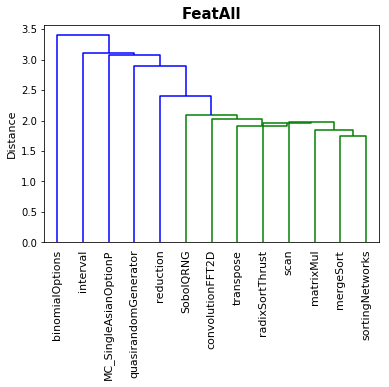

In [78]:
data_array = df_featAll_array

print find_best_method_metric_combination(data_array)


(_, [myMethod, myMetric]) = find_best_method_metric_combination(data_array)

print myMethod, myMetric


pd = pdist(data_array, metric=myMetric)

Z = hierarchy.linkage(data_array, method=myMethod)

plt.title('FeatAll', fontsize=15, fontweight="bold")
plt.ylabel('Distance', fontsize=11)

dn = hierarchy.dendrogram(Z,
                          leaf_rotation=90.,  # rotates the x axis labels
                          leaf_font_size=11,  # font size for the x axis labels
                          labels = app_label
                         )

plt.savefig('featAll.pdf',  transparent = True, bbox_inches='tight')
# plt.savefig('feat15.png',  dpi=300, transparent = True, bbox_inches='tight')

plt.show()

In [79]:
from scipy.spatial.distance import squareform
pd_square = squareform(pd)
(row,cols) = pd_square.shape

if cols <=3:
    print("Error! Fewer cols than 3. We need pick top3 dissimilar apps!")
    sys.exit(1)

for r in xrange(row):
    print("For {} (top3 distant apps):".format(app_label[r]))
    
    local_dist = pd_square[r,:]
    #print local_dist
    
    # find the top 3 most distant app (larger the distant, the better)
    
    # 1) sort the array : with descending order
    local_dist_sorted = np.sort(local_dist)[::-1]
    #print local_dist_sorted
    
    # 2) pick the first 3 apps
    top3_distant = local_dist_sorted[:3]
    #print top3_distant
    
    top3_appName = ['','','']
    
    count = 0
    for pos, dist in enumerate(local_dist):
#         print pos, dist
#         print pos, local_dist[pos]
        if top3_distant[0] == dist:
            top3_appName[0] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
        
        if top3_distant[1] == dist:
            #print pos, dist, app_label[pos]
            top3_appName[1] = app_label[pos]
            count = count + 1
            
        if top3_distant[2] == dist:
            top3_appName[2] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
            
        if count >=3:
            break
            
    print top3_distant
    print top3_appName
    print "\n"


For mergeSort (top3 distant apps):
[ 3.61569988  3.54506555  3.02671691]
['interval', 'binomialOptions', 'MC_SingleAsianOptionP']


For radixSortThrust (top3 distant apps):
[ 4.02247164  3.43190044  3.39894557]
['binomialOptions', 'interval', 'quasirandomGenerator']


For scan (top3 distant apps):
[ 3.96617916  3.66668784  3.49622314]
['binomialOptions', 'MC_SingleAsianOptionP', 'quasirandomGenerator']


For SobolQRNG (top3 distant apps):
[ 4.02126975  3.59628676  3.54368148]
['binomialOptions', 'reduction', 'interval']


For transpose (top3 distant apps):
[ 4.06924516  3.86172909  3.21518628]
['binomialOptions', 'interval', 'quasirandomGenerator']


For interval (top3 distant apps):
[ 4.45608749  4.1517827   3.86172909]
['MC_SingleAsianOptionP', 'binomialOptions', 'transpose']


For binomialOptions (top3 distant apps):
[ 4.58676995  4.32120151  4.29374806]
['MC_SingleAsianOptionP', 'reduction', 'convolutionFFT2D']


For matrixMul (top3 distant apps):
[ 3.95098987  3.47490827  3.309219

### dendrogram for feat09

In [80]:
app_label = list(df_app_scale_feat09['AppName'])
print app_label

df_feat09_data = df_app_scale_feat09.drop('AppName', axis=1)
df_feat09_array = df_feat09_data.as_matrix()

['mergeSort', 'radixSortThrust', 'scan', 'SobolQRNG', 'transpose', 'interval', 'binomialOptions', 'matrixMul', 'quasirandomGenerator', 'reduction', 'convolutionFFT2D', 'MC_SingleAsianOptionP', 'sortingNetworks']


(0.87422840302136329, ['average', 'euclidean'])
average euclidean


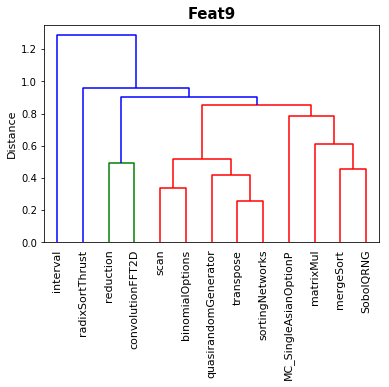

In [81]:
data_array = df_feat09_array

print find_best_method_metric_combination(data_array)
(_, [myMethod, myMetric]) = find_best_method_metric_combination(data_array)
print myMethod, myMetric

#
# override the previous metrics
#
myMethod= 'centroid'
myMetric = 'euclidean'

pd = pdist(data_array, metric=myMetric)

Z = hierarchy.linkage(data_array, method=myMethod)

plt.title('Feat9', fontsize=15, fontweight="bold")
plt.ylabel('Distance', fontsize=11)

dn = hierarchy.dendrogram(Z,
                          leaf_rotation=90.,  # rotates the x axis labels
                          leaf_font_size=11,  # font size for the x axis labels
                          labels = app_label
                         )

plt.savefig('feat9.pdf',  transparent = True, bbox_inches='tight')
# plt.savefig('feat15.png',  dpi=300, transparent = True, bbox_inches='tight')

plt.show()

In [82]:
from scipy.spatial.distance import squareform
pd_square = squareform(pd)
(row,cols) = pd_square.shape

if cols <=3:
    print("Error! Fewer cols than 3. We need pick top3 dissimilar apps!")
    sys.exit(1)

for r in xrange(row):
    print("For {} (top3 distant apps):".format(app_label[r]))
    
    local_dist = pd_square[r,:]
    #print local_dist
    
    # find the top 3 most distant app (larger the distant, the better)
    
    # 1) sort the array : with descending order
    local_dist_sorted = np.sort(local_dist)[::-1]
    #print local_dist_sorted
    
    # 2) pick the first 3 apps
    top3_distant = local_dist_sorted[:3]
    #print top3_distant
    
    top3_appName = ['','','']
    
    count = 0
    for pos, dist in enumerate(local_dist):
#         print pos, dist
#         print pos, local_dist[pos]
        if top3_distant[0] == dist:
            top3_appName[0] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
        
        if top3_distant[1] == dist:
            #print pos, dist, app_label[pos]
            top3_appName[1] = app_label[pos]
            count = count + 1
            
        if top3_distant[2] == dist:
            top3_appName[2] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
            
        if count >=3:
            break
            
    print top3_distant
    print top3_appName
    print "\n"


For mergeSort (top3 distant apps):
[ 1.26032321  1.08147769  1.04307804]
['interval', 'reduction', 'binomialOptions']


For radixSortThrust (top3 distant apps):
[ 1.56088319  1.46536518  1.27546281]
['interval', 'binomialOptions', 'scan']


For scan (top3 distant apps):
[ 1.5282444   1.27546281  1.2586465 ]
['interval', 'radixSortThrust', 'matrixMul']


For SobolQRNG (top3 distant apps):
[ 1.31594774  1.13070422  1.07277454]
['reduction', 'interval', 'convolutionFFT2D']


For transpose (top3 distant apps):
[ 1.42799012  1.0693146   1.02961197]
['interval', 'radixSortThrust', 'matrixMul']


For interval (top3 distant apps):
[ 1.7312963   1.56088319  1.5599156 ]
['reduction', 'radixSortThrust', 'convolutionFFT2D']


For binomialOptions (top3 distant apps):
[ 1.52591267  1.46536518  1.28511244]
['interval', 'radixSortThrust', 'matrixMul']


For matrixMul (top3 distant apps):
[ 1.53227209  1.43963724  1.31109715]
['reduction', 'interval', 'convolutionFFT2D']


For quasirandomGenerator (top

### dendrogram for feat12

In [83]:
app_label = list(df_app_scale_feat12['AppName'])
print app_label

df_feat12_data = df_app_scale_feat12.drop('AppName', axis=1)
df_feat12_array = df_feat12_data.as_matrix()

['mergeSort', 'radixSortThrust', 'scan', 'SobolQRNG', 'transpose', 'interval', 'binomialOptions', 'matrixMul', 'quasirandomGenerator', 'reduction', 'convolutionFFT2D', 'MC_SingleAsianOptionP', 'sortingNetworks']


(0.86313167230418375, ['average', 'euclidean'])
average euclidean


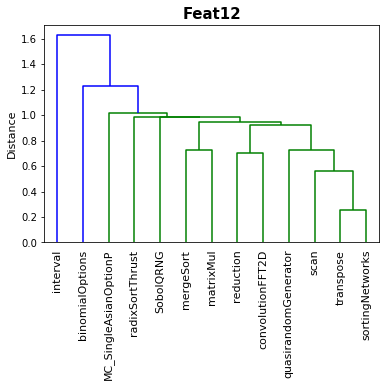

In [84]:
data_array = df_feat12_array

print find_best_method_metric_combination(data_array)

(_, [myMethod, myMetric]) = find_best_method_metric_combination(data_array)
print myMethod, myMetric

#
# override the previous metrics
#
myMethod= 'centroid'
myMetric = 'euclidean'

pd = pdist(data_array, metric=myMetric)

Z = hierarchy.linkage(data_array, method=myMethod)

plt.title('Feat12', fontsize=15, fontweight="bold")
plt.ylabel('Distance', fontsize=11)

dn = hierarchy.dendrogram(Z,
                          leaf_rotation=90.,  # rotates the x axis labels
                          leaf_font_size=11,  # font size for the x axis labels
                          labels = app_label
                         )

plt.savefig('feat12.pdf',  transparent = True, bbox_inches='tight')
# plt.savefig('feat15.png',  dpi=300, transparent = True, bbox_inches='tight')

plt.show()

In [85]:
from scipy.spatial.distance import squareform
pd_square = squareform(pd)
(row,cols) = pd_square.shape

if cols <=3:
    print("Error! Fewer cols than 3. We need pick top3 dissimilar apps!")
    sys.exit(1)

for r in xrange(row):
    print("For {} (top3 distant apps):".format(app_label[r]))
    
    local_dist = pd_square[r,:]
    #print local_dist
    
    # find the top 3 most distant app (larger the distant, the better)
    
    # 1) sort the array : with descending order
    local_dist_sorted = np.sort(local_dist)[::-1]
    #print local_dist_sorted
    
    # 2) pick the first 3 apps
    top3_distant = local_dist_sorted[:3]
    #print top3_distant
    
    top3_appName = ['','','']
    
    count = 0
    for pos, dist in enumerate(local_dist):
#         print pos, dist
#         print pos, local_dist[pos]
        if top3_distant[0] == dist:
            top3_appName[0] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
        
        if top3_distant[1] == dist:
            #print pos, dist, app_label[pos]
            top3_appName[1] = app_label[pos]
            count = count + 1
            
        if top3_distant[2] == dist:
            top3_appName[2] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
            
        if count >=3:
            break
            
    print top3_distant
    print top3_appName
    print "\n"


For mergeSort (top3 distant apps):
[ 1.60478945  1.4856527   1.13931204]
['interval', 'binomialOptions', 'quasirandomGenerator']


For radixSortThrust (top3 distant apps):
[ 1.83974478  1.79611605  1.42359764]
['interval', 'binomialOptions', 'quasirandomGenerator']


For scan (top3 distant apps):
[ 1.84787025  1.38036387  1.32700507]
['interval', 'matrixMul', 'MC_SingleAsianOptionP']


For SobolQRNG (top3 distant apps):
[ 1.76884402  1.74126262  1.65298202]
['interval', 'binomialOptions', 'reduction']


For transpose (top3 distant apps):
[ 1.75604483  1.23090223  1.16606537]
['interval', 'binomialOptions', 'MC_SingleAsianOptionP']


For interval (top3 distant apps):
[ 2.0507874   1.96842739  1.9121827 ]
['binomialOptions', 'reduction', 'quasirandomGenerator']


For binomialOptions (top3 distant apps):
[ 2.0507874   1.79611605  1.74126262]
['interval', 'radixSortThrust', 'SobolQRNG']


For matrixMul (top3 distant apps):
[ 1.75461715  1.57395862  1.43631664]
['interval', 'reduction', 'bi

### dendrogram for feat14

In [86]:
app_label = list(df_app_scale_feat14['AppName'])
#print app_label

df_feat14_data = df_app_scale_feat14.drop('AppName', axis=1)
df_feat14_array = df_feat14_data.as_matrix()

(0.82173663374012584, ['average', 'euclidean'])
average euclidean


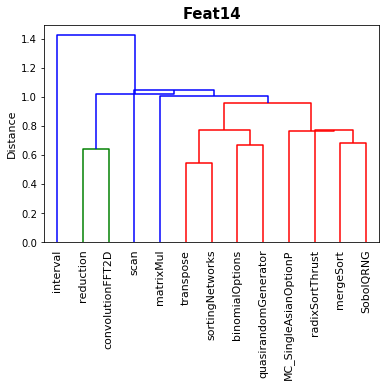

In [87]:
data_array = df_feat14_array

print find_best_method_metric_combination(data_array)

(_, [myMethod, myMetric]) = find_best_method_metric_combination(data_array)
print myMethod, myMetric

#
# override the previous metrics
#
myMethod= 'centroid'
myMetric = 'euclidean'


pd = pdist(data_array, metric=myMetric)

Z = hierarchy.linkage(data_array, method=myMethod)

plt.title('Feat14', fontsize=15, fontweight="bold")
plt.ylabel('Distance', fontsize=11)

dn = hierarchy.dendrogram(Z,
                          leaf_rotation=90.,  # rotates the x axis labels
                          leaf_font_size=11,  # font size for the x axis labels
                          labels = app_label
                         )

plt.savefig('feat14.pdf',  transparent = True, bbox_inches='tight')
# plt.savefig('feat15.png',  dpi=300, transparent = True, bbox_inches='tight')

plt.show()

In [88]:
from scipy.spatial.distance import squareform
pd_square = squareform(pd)
(row,cols) = pd_square.shape

if cols <=3:
    print("Error! Fewer cols than 3. We need pick top3 dissimilar apps!")
    sys.exit(1)

for r in xrange(row):
    print("For {} (top3 distant apps):".format(app_label[r]))
    
    local_dist = pd_square[r,:]
    #print local_dist
    
    # find the top 3 most distant app (larger the distant, the better)
    
    # 1) sort the array : with descending order
    local_dist_sorted = np.sort(local_dist)[::-1]
    #print local_dist_sorted
    
    # 2) pick the first 3 apps
    top3_distant = local_dist_sorted[:3]
    #print top3_distant
    
    top3_appName = ['','','']
    
    count = 0
    for pos, dist in enumerate(local_dist):
#         print pos, dist
#         print pos, local_dist[pos]
        if top3_distant[0] == dist:
            top3_appName[0] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
        
        if top3_distant[1] == dist:
            #print pos, dist, app_label[pos]
            top3_appName[1] = app_label[pos]
            count = count + 1
            
        if top3_distant[2] == dist:
            top3_appName[2] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
            
        if count >=3:
            break
            
    print top3_distant
    print top3_appName
    print "\n"


For mergeSort (top3 distant apps):
[ 1.52432882  1.32980966  1.27308167]
['interval', 'reduction', 'binomialOptions']


For radixSortThrust (top3 distant apps):
[ 1.63199429  1.61535193  1.42249659]
['binomialOptions', 'interval', 'quasirandomGenerator']


For scan (top3 distant apps):
[ 1.83491447  1.49449155  1.42255578]
['interval', 'matrixMul', 'quasirandomGenerator']


For SobolQRNG (top3 distant apps):
[ 1.55269087  1.39150399  1.34959379]
['reduction', 'scan', 'interval']


For transpose (top3 distant apps):
[ 1.65426975  1.28052161  1.25822107]
['interval', 'matrixMul', 'reduction']


For interval (top3 distant apps):
[ 1.83491447  1.7699977   1.75845057]
['scan', 'binomialOptions', 'reduction']


For binomialOptions (top3 distant apps):
[ 1.7699977   1.63199429  1.50043187]
['interval', 'radixSortThrust', 'convolutionFFT2D']


For matrixMul (top3 distant apps):
[ 1.55692035  1.50022785  1.49449155]
['reduction', 'quasirandomGenerator', 'scan']


For quasirandomGenerator (top3 

### dendrogram for feat18

In [89]:
app_label = list(df_app_scale_feat18['AppName'])
#print app_label

df_feat18_data = df_app_scale_feat18.drop('AppName', axis=1)
df_feat18_array = df_feat18_data.as_matrix()

(0.83998463480560215, ['average', 'euclidean'])
average euclidean


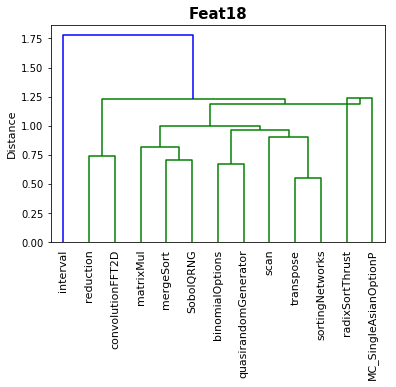

In [90]:
data_array = df_feat18_array

print find_best_method_metric_combination(data_array)

(_, [myMethod, myMetric]) = find_best_method_metric_combination(data_array)

print myMethod, myMetric

#
# override the previous metrics
#
myMethod= 'centroid'
myMetric = 'euclidean'


pd = pdist(data_array, metric=myMetric)

Z = hierarchy.linkage(data_array, method=myMethod)

plt.title('Feat18', fontsize=15, fontweight="bold")
plt.ylabel('Distance', fontsize=11)

dn = hierarchy.dendrogram(Z,
                          leaf_rotation=90.,  # rotates the x axis labels
                          leaf_font_size=11,  # font size for the x axis labels
                          labels = app_label
                         )

plt.savefig('feat18.pdf',  transparent = True, bbox_inches='tight')
# plt.savefig('feat15.png',  dpi=300, transparent = True, bbox_inches='tight')

plt.show()

In [91]:
from scipy.spatial.distance import squareform
pd_square = squareform(pd)
(row,cols) = pd_square.shape

if cols <=3:
    print("Error! Fewer cols than 3. We need pick top3 dissimilar apps!")
    sys.exit(1)

for r in xrange(row):
    print("For {} (top3 distant apps):".format(app_label[r]))
    
    local_dist = pd_square[r,:]
    #print local_dist
    
    # find the top 3 most distant app (larger the distant, the better)
    
    # 1) sort the array : with descending order
    local_dist_sorted = np.sort(local_dist)[::-1]
    #print local_dist_sorted
    
    # 2) pick the first 3 apps
    top3_distant = local_dist_sorted[:3]
    #print top3_distant
    
    top3_appName = ['','','']
    
    count = 0
    for pos, dist in enumerate(local_dist):
#         print pos, dist
#         print pos, local_dist[pos]
        if top3_distant[0] == dist:
            top3_appName[0] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
        
        if top3_distant[1] == dist:
            #print pos, dist, app_label[pos]
            top3_appName[1] = app_label[pos]
            count = count + 1
            
        if top3_distant[2] == dist:
            top3_appName[2] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
            
        if count >=3:
            break
            
    print top3_distant
    print top3_appName
    print "\n"


For mergeSort (top3 distant apps):
[ 1.85541329  1.48440118  1.3557575 ]
['interval', 'reduction', 'binomialOptions']


For radixSortThrust (top3 distant apps):
[ 2.18978485  1.98472935  1.81636854]
['interval', 'binomialOptions', 'quasirandomGenerator']


For scan (top3 distant apps):
[ 1.88128362  1.75646857  1.6387511 ]
['interval', 'MC_SingleAsianOptionP', 'radixSortThrust']


For SobolQRNG (top3 distant apps):
[ 1.87884711  1.7220555   1.46864729]
['reduction', 'interval', 'convolutionFFT2D']


For transpose (top3 distant apps):
[ 2.03211336  1.42867754  1.36644552]
['interval', 'reduction', 'matrixMul']


For interval (top3 distant apps):
[ 2.32401635  2.2210405   2.18978485]
['reduction', 'convolutionFFT2D', 'radixSortThrust']


For binomialOptions (top3 distant apps):
[ 2.00154016  1.98472935  1.90301893]
['interval', 'radixSortThrust', 'MC_SingleAsianOptionP']


For matrixMul (top3 distant apps):
[ 1.88838283  1.82663958  1.74521997]
['reduction', 'interval', 'MC_SingleAsianOp

### dendrogram for feat26

In [92]:
app_label = list(df_app_scale_feat26['AppName'])
#print app_label

df_feat26_data = df_app_scale_feat26.drop('AppName', axis=1)
df_feat26_array = df_feat26_data.as_matrix()

(0.84871885198080133, ['average', 'euclidean'])
average euclidean


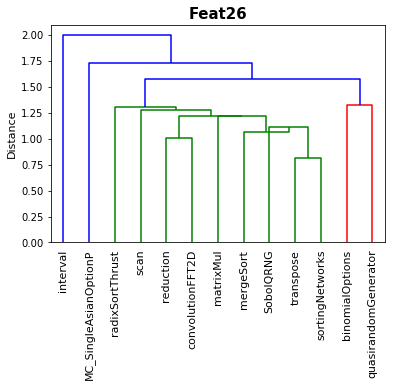

In [93]:
data_array = df_feat26_array

print find_best_method_metric_combination(data_array)


(_, [myMethod, myMetric]) = find_best_method_metric_combination(data_array)

print myMethod, myMetric

#
# override the previous metrics
#
myMethod= 'centroid'
myMetric = 'euclidean'


pd = pdist(data_array, metric=myMetric)

Z = hierarchy.linkage(data_array, method=myMethod)

plt.title('Feat26', fontsize=15, fontweight="bold")
plt.ylabel('Distance', fontsize=11)

dn = hierarchy.dendrogram(Z,
                          leaf_rotation=90.,  # rotates the x axis labels
                          leaf_font_size=11,  # font size for the x axis labels
                          labels = app_label
                         )

plt.savefig('feat26.pdf',  transparent = True, bbox_inches='tight')
# plt.savefig('feat15.png',  dpi=300, transparent = True, bbox_inches='tight')

plt.show()

In [94]:
from scipy.spatial.distance import squareform
pd_square = squareform(pd)
(row,cols) = pd_square.shape

if cols <=3:
    print("Error! Fewer cols than 3. We need pick top3 dissimilar apps!")
    sys.exit(1)

for r in xrange(row):
    print("For {} (top3 distant apps):".format(app_label[r]))
    
    local_dist = pd_square[r,:]
    #print local_dist
    
    # find the top 3 most distant app (larger the distant, the better)
    
    # 1) sort the array : with descending order
    local_dist_sorted = np.sort(local_dist)[::-1]
    #print local_dist_sorted
    
    # 2) pick the first 3 apps
    top3_distant = local_dist_sorted[:3]
    #print top3_distant
    
    top3_appName = ['','','']
    
    count = 0
    for pos, dist in enumerate(local_dist):
#         print pos, dist
#         print pos, local_dist[pos]
        if top3_distant[0] == dist:
            top3_appName[0] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
        
        if top3_distant[1] == dist:
            #print pos, dist, app_label[pos]
            top3_appName[1] = app_label[pos]
            count = count + 1
            
        if top3_distant[2] == dist:
            top3_appName[2] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
            
        if count >=3:
            break
            
    print top3_distant
    print top3_appName
    print "\n"


For mergeSort (top3 distant apps):
[ 2.26308746  1.86018303  1.78324112]
['interval', 'binomialOptions', 'reduction']


For radixSortThrust (top3 distant apps):
[ 2.58869963  2.55113765  2.48240646]
['interval', 'binomialOptions', 'quasirandomGenerator']


For scan (top3 distant apps):
[ 2.38520948  2.23843519  2.01489599]
['MC_SingleAsianOptionP', 'interval', 'binomialOptions']


For SobolQRNG (top3 distant apps):
[ 2.21179508  2.13435907  2.05369878]
['interval', 'binomialOptions', 'reduction']


For transpose (top3 distant apps):
[ 2.26633207  1.90429233  1.89857555]
['interval', 'MC_SingleAsianOptionP', 'binomialOptions']


For interval (top3 distant apps):
[ 2.58869963  2.54984139  2.54549553]
['radixSortThrust', 'MC_SingleAsianOptionP', 'binomialOptions']


For binomialOptions (top3 distant apps):
[ 2.55113765  2.54549553  2.34064382]
['radixSortThrust', 'interval', 'MC_SingleAsianOptionP']


For matrixMul (top3 distant apps):
[ 2.12069861  2.0885747   2.03041336]
['MC_SingleAsia

### dendrogram for feat42

In [95]:
app_label = list(df_app_scale_feat42['AppName'])
#print app_label

df_feat42_data = df_app_scale_feat42.drop('AppName', axis=1)
df_feat42_array = df_feat42_data.as_matrix()

(0.83570267920062735, ['centroid', 'cosine'])
centroid cosine


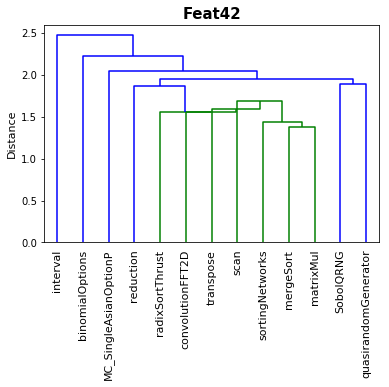

In [96]:
data_array = df_feat42_array

print find_best_method_metric_combination(data_array)


(_, [myMethod, myMetric]) = find_best_method_metric_combination(data_array)

print myMethod, myMetric

#
# override the previous metrics
#
myMethod= 'centroid'
myMetric = 'euclidean'


pd = pdist(data_array, metric=myMetric)

Z = hierarchy.linkage(data_array, method=myMethod)

plt.title('Feat42', fontsize=15, fontweight="bold")
plt.ylabel('Distance', fontsize=11)

dn = hierarchy.dendrogram(Z,
                          leaf_rotation=90.,  # rotates the x axis labels
                          leaf_font_size=11,  # font size for the x axis labels
                          labels = app_label
                         )

plt.savefig('feat42.pdf',  transparent = True, bbox_inches='tight')
# plt.savefig('feat15.png',  dpi=300, transparent = True, bbox_inches='tight')

plt.show()

In [97]:
from scipy.spatial.distance import squareform
pd_square = squareform(pd)
(row,cols) = pd_square.shape

if cols <=3:
    print("Error! Fewer cols than 3. We need pick top3 dissimilar apps!")
    sys.exit(1)

for r in xrange(row):
    print("For {} (top3 distant apps):".format(app_label[r]))
    
    local_dist = pd_square[r,:]
    #print local_dist
    
    # find the top 3 most distant app (larger the distant, the better)
    
    # 1) sort the array : with descending order
    local_dist_sorted = np.sort(local_dist)[::-1]
    #print local_dist_sorted
    
    # 2) pick the first 3 apps
    top3_distant = local_dist_sorted[:3]
    #print top3_distant
    
    top3_appName = ['','','']
    
    count = 0
    for pos, dist in enumerate(local_dist):
#         print pos, dist
#         print pos, local_dist[pos]
        if top3_distant[0] == dist:
            top3_appName[0] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
        
        if top3_distant[1] == dist:
            #print pos, dist, app_label[pos]
            top3_appName[1] = app_label[pos]
            count = count + 1
            
        if top3_distant[2] == dist:
            top3_appName[2] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
            
        if count >=3:
            break
            
    print top3_distant
    print top3_appName
    print "\n"


For mergeSort (top3 distant apps):
[ 2.87371443  2.42535133  2.27132955]
['interval', 'reduction', 'binomialOptions']


For radixSortThrust (top3 distant apps):
[ 2.9858401   2.9112764   2.90323025]
['binomialOptions', 'interval', 'quasirandomGenerator']


For scan (top3 distant apps):
[ 2.77464797  2.70088646  2.68431674]
['interval', 'quasirandomGenerator', 'MC_SingleAsianOptionP']


For SobolQRNG (top3 distant apps):
[ 3.13430116  3.08616708  2.97644996]
['reduction', 'interval', 'binomialOptions']


For transpose (top3 distant apps):
[ 3.07859013  2.78371255  2.56157145]
['interval', 'binomialOptions', 'reduction']


For interval (top3 distant apps):
[ 3.33077511  3.08616708  3.07859013]
['MC_SingleAsianOptionP', 'SobolQRNG', 'transpose']


For binomialOptions (top3 distant apps):
[ 3.26048855  2.9858401   2.97644996]
['MC_SingleAsianOptionP', 'radixSortThrust', 'SobolQRNG']


For matrixMul (top3 distant apps):
[ 2.86007041  2.63678659  2.55298646]
['MC_SingleAsianOptionP', 'quasir

### dendrogram for feat64

In [98]:
app_label = list(df_app_scale_feat64['AppName'])
#print app_label

df_feat64_data = df_app_scale_feat64.drop('AppName', axis=1)
df_feat64_array = df_feat64_data.as_matrix()

(0.85236295506043702, ['average', 'euclidean'])
average euclidean


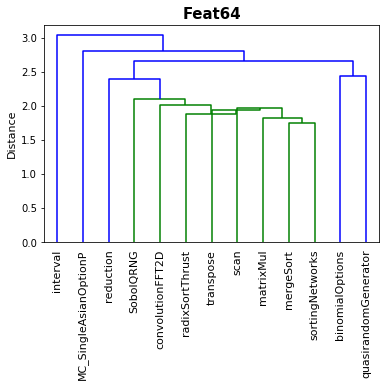

In [99]:
data_array = df_feat64_array

print find_best_method_metric_combination(data_array)


(_, [myMethod, myMetric]) = find_best_method_metric_combination(data_array)

print myMethod, myMetric

#
# override the previous metrics
#
myMethod= 'centroid'
myMetric = 'euclidean'

pd = pdist(data_array, metric=myMetric)

Z = hierarchy.linkage(data_array, method=myMethod)

plt.title('Feat64', fontsize=15, fontweight="bold")
plt.ylabel('Distance', fontsize=11)

dn = hierarchy.dendrogram(Z,
                          leaf_rotation=90.,  # rotates the x axis labels
                          leaf_font_size=11,  # font size for the x axis labels
                          labels = app_label
                         )

plt.savefig('feat64.pdf',  transparent = True, bbox_inches='tight')
# plt.savefig('feat15.png',  dpi=300, transparent = True, bbox_inches='tight')

plt.show()

In [100]:
from scipy.spatial.distance import squareform
pd_square = squareform(pd)
(row,cols) = pd_square.shape

if cols <=3:
    print("Error! Fewer cols than 3. We need pick top3 dissimilar apps!")
    sys.exit(1)

for r in xrange(row):
    print("For {} (top3 distant apps):".format(app_label[r]))
    
    local_dist = pd_square[r,:]
    #print local_dist
    
    # find the top 3 most distant app (larger the distant, the better)
    
    # 1) sort the array : with descending order
    local_dist_sorted = np.sort(local_dist)[::-1]
    #print local_dist_sorted
    
    # 2) pick the first 3 apps
    top3_distant = local_dist_sorted[:3]
    #print top3_distant
    
    top3_appName = ['','','']
    
    count = 0
    for pos, dist in enumerate(local_dist):
#         print pos, dist
#         print pos, local_dist[pos]
        if top3_distant[0] == dist:
            top3_appName[0] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
        
        if top3_distant[1] == dist:
            #print pos, dist, app_label[pos]
            top3_appName[1] = app_label[pos]
            count = count + 1
            
        if top3_distant[2] == dist:
            top3_appName[2] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
            
        if count >=3:
            break
            
    print top3_distant
    print top3_appName
    print "\n"


For mergeSort (top3 distant apps):
[ 3.58433058  2.98175899  2.91886944]
['interval', 'reduction', 'binomialOptions']


For radixSortThrust (top3 distant apps):
[ 3.46563289  3.402914    3.38505728]
['binomialOptions', 'interval', 'quasirandomGenerator']


For scan (top3 distant apps):
[ 3.48947887  3.4345206   3.40439209]
['quasirandomGenerator', 'MC_SingleAsianOptionP', 'binomialOptions']


For SobolQRNG (top3 distant apps):
[ 3.59141611  3.52479097  3.46988501]
['reduction', 'interval', 'binomialOptions']


For transpose (top3 distant apps):
[ 3.82290051  3.5066092   3.18500938]
['interval', 'binomialOptions', 'quasirandomGenerator']


For interval (top3 distant apps):
[ 4.2668634   3.82689195  3.82290051]
['MC_SingleAsianOptionP', 'convolutionFFT2D', 'transpose']


For binomialOptions (top3 distant apps):
[ 3.93853075  3.80715315  3.78726972]
['MC_SingleAsianOptionP', 'reduction', 'convolutionFFT2D']


For matrixMul (top3 distant apps):
[ 3.72793009  3.30490301  3.06614378]
['MC_Si

### dendrogram for featMystic

In [101]:
app_label = list(df_app_scale_featMystic['AppName'])
#print app_label

df_featMystic_data = df_app_scale_featMystic.drop('AppName', axis=1)
df_featMystic_array = df_featMystic_data.as_matrix()

(0.7877425104916862, ['average', 'euclidean'])
average euclidean


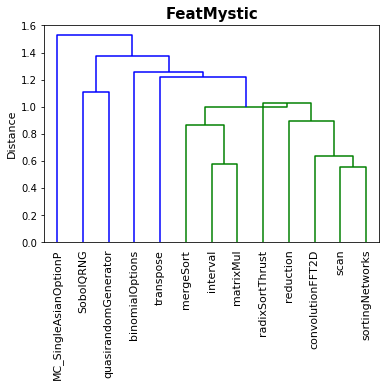

In [102]:
data_array = df_featMystic_array
#print data_array.shape

print find_best_method_metric_combination(data_array)


(_, [myMethod, myMetric]) = find_best_method_metric_combination(data_array)

print myMethod, myMetric

#
# override the previous metrics
#
myMethod= 'centroid'
myMetric = 'euclidean'

pd = pdist(data_array, metric=myMetric)
#print pd.shape

Z = hierarchy.linkage(data_array, method=myMethod)

plt.title('FeatMystic', fontsize=15, fontweight="bold")
plt.ylabel('Distance', fontsize=11)

dn = hierarchy.dendrogram(Z,
                          leaf_rotation=90.,  # rotates the x axis labels
                          leaf_font_size=11,  # font size for the x axis labels
                          labels = app_label
                         )

plt.savefig('featMystic.pdf',  transparent = True, bbox_inches='tight')
# plt.savefig('feat15.png',  dpi=300, transparent = True, bbox_inches='tight')

plt.show()

In [103]:
from scipy.spatial.distance import squareform
pd_square = squareform(pd)
(row,cols) = pd_square.shape

if cols <=3:
    print("Error! Fewer cols than 3. We need pick top3 dissimilar apps!")
    sys.exit(1)

for r in xrange(row):
    print("For {} (top3 distant apps):".format(app_label[r]))
    
    local_dist = pd_square[r,:]
    #print local_dist
    
    # find the top 3 most distant app (larger the distant, the better)
    
    # 1) sort the array : with descending order
    local_dist_sorted = np.sort(local_dist)[::-1]
    #print local_dist_sorted
    
    # 2) pick the first 3 apps
    top3_distant = local_dist_sorted[:3]
    #print top3_distant
    
    top3_appName = ['','','']
    
    count = 0
    for pos, dist in enumerate(local_dist):
#         print pos, dist
#         print pos, local_dist[pos]
        if top3_distant[0] == dist:
            top3_appName[0] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
        
        if top3_distant[1] == dist:
            #print pos, dist, app_label[pos]
            top3_appName[1] = app_label[pos]
            count = count + 1
            
        if top3_distant[2] == dist:
            top3_appName[2] = app_label[pos]
            count = count + 1
            #print pos, dist, app_label[pos]
            
        if count >=3:
            break
            
    print top3_distant
    print top3_appName
    print "\n"


For mergeSort (top3 distant apps):
[ 1.41993669  1.38156041  1.34489478]
['reduction', 'MC_SingleAsianOptionP', 'binomialOptions']


For radixSortThrust (top3 distant apps):
[ 1.90915876  1.88558308  1.82979537]
['SobolQRNG', 'quasirandomGenerator', 'binomialOptions']


For scan (top3 distant apps):
[ 1.81382511  1.71076283  1.52255585]
['SobolQRNG', 'MC_SingleAsianOptionP', 'quasirandomGenerator']


For SobolQRNG (top3 distant apps):
[ 2.41223089  2.12480781  1.97096399]
['reduction', 'binomialOptions', 'MC_SingleAsianOptionP']


For transpose (top3 distant apps):
[ 1.7901555   1.77849116  1.75250882]
['interval', 'matrixMul', 'binomialOptions']


For interval (top3 distant apps):
[ 2.11861784  1.7901555   1.73653275]
['MC_SingleAsianOptionP', 'transpose', 'SobolQRNG']


For binomialOptions (top3 distant apps):
[ 2.22467545  2.12480781  1.82979537]
['MC_SingleAsianOptionP', 'SobolQRNG', 'radixSortThrust']


For matrixMul (top3 distant apps):
[ 1.94969206  1.77849116  1.67924489]
['MC_